In [1]:
#File Importing and Setting Data 
import numpy as np
import pandas as pd
file=pd.read_csv('gene.csv',low_memory=False)
working=file.drop('ID',axis=1)
X=working.drop('Class',axis=1)
y=working['Class']
X=np.c_[X]
type(X)

numpy.ndarray

In [ ]:
#Hyperparameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[3,4,5],'learning_rate':[0.075,0.0825,0.0875,0.09,0.095,0.115], 'n_estimators':[42,43,44,45,46,47,48],'loss':['exponential','deviance']}
grid=GridSearchCV(XGBClassifier(),param_grid,scoring='roc_auc', n_jobs=-1 ,verbose=1,cv=5)
grid.fit(X,y)
grid_predictions=grid.predict(X)
print(grid.best_params_)
pd.crosstab(y,grid_predictions,colnames=['Predicted'],rownames=['Actual'])

In [ ]:
pd.DataFrame(grid.cv_results_)

In [ ]:
grid.best_params_

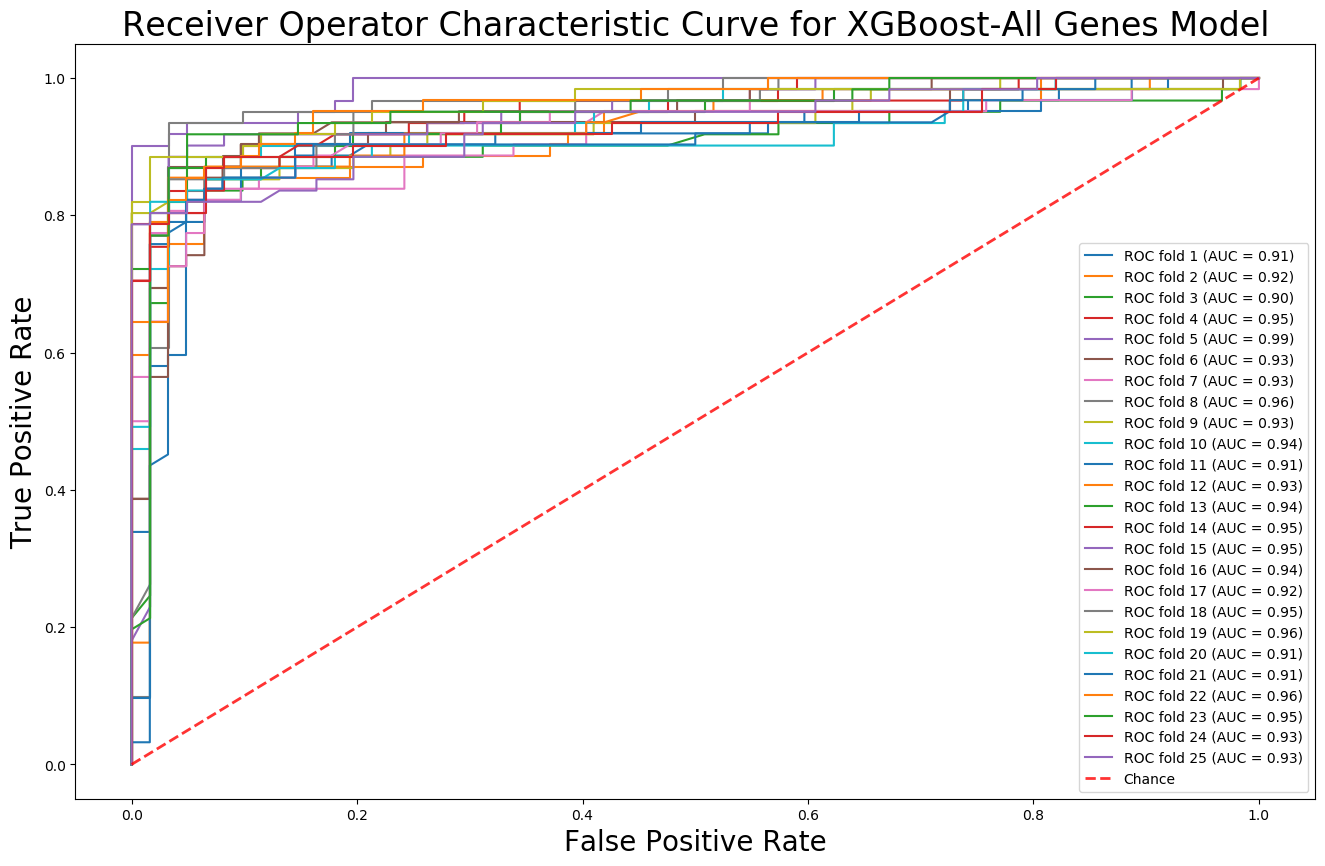

In [2]:
#Model and ROC plot
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(47568)
classifier=XGBClassifier(max_depth=3,learning_rate=0.0875,n_estimators=43,loss='exponential',n_jobs=-1)
aucs=[]
tpr1=[]
fpr1=[]
plt.figure(figsize=(16, 10), dpi=100, facecolor='w', edgecolor='k')
i = 1
for loops in range(0,5):
    cv=StratifiedKFold(n_splits=5,shuffle=True)
    for train, test in cv.split(X, y):
        model= classifier.fit(X[train], y[train])
        prob=model.predict_proba(X[test])
# Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], prob[:, 1])
        tpr=list(tpr)
        fpr=(fpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        tpr1.extend(tpr)
        fpr1.extend(fpr)
        i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
std_auc = np.std(aucs)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('Receiver Operator Characteristic Curve for XGBoost-All Genes Model',size=24)
plt.legend(loc="lower right")
plt.savefig('GTB.png',dpi=100)
plt.show()

In [3]:
print(sum(aucs)/25)
np.std(aucs)

0.9366001623096518


0.019761361811927936

In [ ]:
aucs

In [ ]:
concat=pd.DataFrame(list(zip(tpr1,fpr1)),columns=['tpr','fpr'])
concat.to_csv('LinearConcat.csv')
#Curve Averaging and Error bars done in R

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
GridSearchCV